# Step 1: Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load and Explore the Dataset

In [12]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
data = pd.read_csv(url, delim_whitespace=True, names=column_names)

In [13]:
# Explore the data
print(data.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


# Step 3: Data Preprocessing

Clean and preprocess the data. Handle missing values, convert data types, and encode categorical variables if necessary.

In [14]:
# Handle missing values
data['horsepower'] = data['horsepower'].replace('?', np.nan)
data = data.dropna()


In [15]:
# Convert 'horsepower' column to numeric
data['horsepower'] = data['horsepower'].astype(float)

In [16]:
# Encode categorical variable 'origin'
data = pd.get_dummies(data, columns=['origin'])

# Step 4: Data Splitting

In [17]:
#Split the data into training and testing sets.

X = data.drop(['mpg', 'car_name'], axis=1)
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Training and Evaluation

#Train a linear regression model and evaluate its performance.

In [18]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 10.602279011688339
R-squared: 0.7922774714022587


# Step 6: Model Visualization (Optional)

#We can visualize the model's performance by plotting actual vs. predicted values.

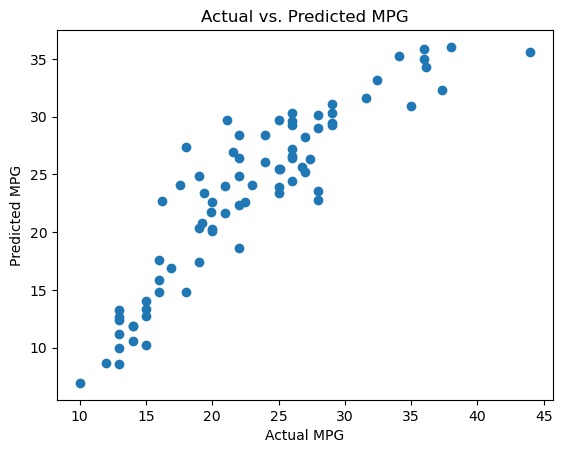

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs. Predicted MPG")
plt.show()



# This is a simple example of an automobile-related machine learning project. Depending on our goals and the dataset's complexity, you can explore more advanced models, feature engineering, hyperparameter tuning, and additional data visualizations to improve the model's accuracy.